# 1. Import and Install Dependencies

In [96]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

In [97]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [98]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [99]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [100]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
   

In [101]:
def draw_styled_landmarks(image, results):
   
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    

In [170]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [103]:
results

mediapipe.python.solution_base.SolutionOutputs

In [104]:
draw_landmarks(frame, results)

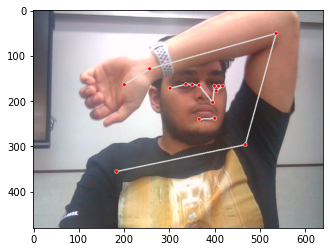

In [105]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [106]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [107]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)


In [108]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
   
    return np.concatenate([pose])

In [109]:
result_test = extract_keypoints(results)

In [110]:
result_test

array([ 6.19450688e-01,  4.23989296e-01, -9.50623035e-01,  9.97780979e-01,
        6.26136184e-01,  3.49272370e-01, -8.98789525e-01,  9.94917691e-01,
        6.40472770e-01,  3.48915070e-01, -8.98482025e-01,  9.93915319e-01,
        6.53314412e-01,  3.49106133e-01, -8.98202419e-01,  9.93127644e-01,
        5.72107971e-01,  3.45253795e-01, -9.01264369e-01,  9.96416390e-01,
        5.49894214e-01,  3.42080116e-01, -9.00682330e-01,  9.96340871e-01,
        5.27601957e-01,  3.39586139e-01, -9.01297748e-01,  9.97500896e-01,
        6.32193208e-01,  3.72704357e-01, -4.58873570e-01,  9.94590223e-01,
        4.72534984e-01,  3.60339910e-01, -4.95541513e-01,  9.98327076e-01,
        6.27779245e-01,  4.97915745e-01, -7.77184129e-01,  9.97162104e-01,
        5.72376370e-01,  5.00986636e-01, -7.86724329e-01,  9.98061538e-01,
        7.31870055e-01,  6.17535710e-01, -3.90902013e-01,  9.96227443e-01,
        2.87893534e-01,  7.40356505e-01, -3.05150896e-01,  9.96248543e-01,
        8.38353336e-01,  

In [111]:
np.save('0', result_test)

In [112]:
np.load('0.npy')

array([ 6.19450688e-01,  4.23989296e-01, -9.50623035e-01,  9.97780979e-01,
        6.26136184e-01,  3.49272370e-01, -8.98789525e-01,  9.94917691e-01,
        6.40472770e-01,  3.48915070e-01, -8.98482025e-01,  9.93915319e-01,
        6.53314412e-01,  3.49106133e-01, -8.98202419e-01,  9.93127644e-01,
        5.72107971e-01,  3.45253795e-01, -9.01264369e-01,  9.96416390e-01,
        5.49894214e-01,  3.42080116e-01, -9.00682330e-01,  9.96340871e-01,
        5.27601957e-01,  3.39586139e-01, -9.01297748e-01,  9.97500896e-01,
        6.32193208e-01,  3.72704357e-01, -4.58873570e-01,  9.94590223e-01,
        4.72534984e-01,  3.60339910e-01, -4.95541513e-01,  9.98327076e-01,
        6.27779245e-01,  4.97915745e-01, -7.77184129e-01,  9.97162104e-01,
        5.72376370e-01,  5.00986636e-01, -7.86724329e-01,  9.98061538e-01,
        7.31870055e-01,  6.17535710e-01, -3.90902013e-01,  9.96227443e-01,
        2.87893534e-01,  7.40356505e-01, -3.05150896e-01,  9.96248543e-01,
        8.38353336e-01,  

# 4. Setup Folders for Collection

In [113]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['tadasan','Vrikshasana','Trikonasana'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [114]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [116]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(5000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [27]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [117]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [118]:
label_map = {label:num for num, label in enumerate(actions)}

In [119]:
label_map

{'tadasan': 0, 'Vrikshasana': 1, 'Trikonasana': 2}

In [120]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [121]:
np.array(sequences).shape

(90, 30, 132)

In [122]:
np.array(labels).shape

(90,)

In [123]:
X = np.array(sequences)

In [124]:
X.shape

(90, 30, 132)

In [125]:
y = to_categorical(labels).astype(int)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [127]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [129]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [130]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,132)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [131]:
res = [.7, 0.2, 0.1]

In [132]:
actions[np.argmax(res)]

'tadasan'

In [133]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [134]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 2s 47ms/step - loss: 1.0230 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.7323 - categorical_accuracy: 0.5294
Epoch 3/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.6209 - categorical_accuracy: 0.6824
Epoch 4/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.9702 - categorical_accuracy: 0.6118
Epoch 5/2000
3/3 [==============================] - 0s 33ms/step - loss: 1.0066 - categorical_accuracy: 0.6000
Epoch 6/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.6733 - categorical_accuracy: 0.6118
Epoch 7/2000
3/3 [==============================] - 0s 34ms/step - loss: 2.0836 - categorical_accuracy: 0.6235
Epoch 8/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.5380 - categorical_accuracy: 0.6706
Epoch 9/2000
3/3 [==============================] - 0s 37ms/step - loss: 0.5234 - categorical_accuracy: 0.6706
E

In [135]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 64)            50432     
                                                                 
 lstm_10 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_11 (LSTM)              (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 204,995
Trainable params: 204,995
Non-tr

# 8. Make Predictions

In [137]:
model.predict(X_test)

array([[2.0632566e-14, 1.0000000e+00, 4.2125828e-15],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 2.0171161e-28, 0.0000000e+00],
       [1.8977278e-19, 1.0000000e+00, 2.5908406e-19],
       [1.0870016e-12, 1.9689601e-07, 9.9999976e-01]], dtype=float32)

In [136]:
res = model.predict(X_test)

In [138]:
actions[np.argmax(res[0])]

'Vrikshasana'

In [141]:
actions[np.argmax(y_test[2])]

'tadasan'

# 9. Save Weights

In [142]:
model.save('yog.h5')

In [57]:
del model

In [143]:
model.load_weights('yog.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [144]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [145]:
yhat = model.predict(X_test)

In [146]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [147]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 1],
        [0, 1]],

       [[2, 0],
        [1, 2]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [148]:
accuracy_score(ytrue, yhat)

0.8

# 11. Test in Real Time

In [149]:
from scipy import stats

In [151]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

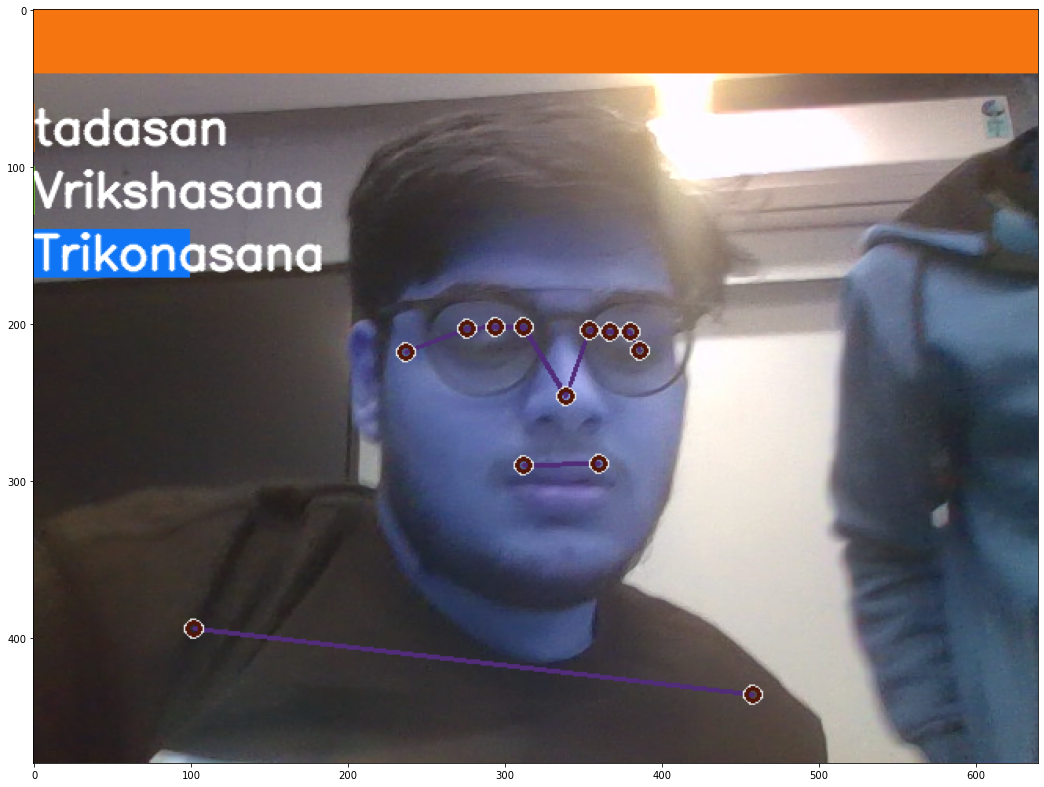

In [155]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [156]:
sequence.reverse()

In [23]:
len(sequence)

1

In [157]:
sequence.append('def')

In [158]:
sequence.reverse()

In [159]:
sequence[-30:]

[array([ 0.56956798,  0.20903644, -0.48930651,  0.98827845,  0.57296532,
         0.17808038, -0.4484109 ,  0.97428077,  0.58187521,  0.17470011,
        -0.44860679,  0.97559839,  0.59055841,  0.17204878, -0.44880024,
         0.97725791,  0.54787189,  0.19178002, -0.45517224,  0.97602117,
         0.54109746,  0.19757384, -0.45530748,  0.97446662,  0.53460681,
         0.20401379, -0.45567971,  0.97619563,  0.61030608,  0.18097568,
        -0.22881456,  0.98097765,  0.5327363 ,  0.23159605, -0.2563366 ,
         0.97400063,  0.59747565,  0.23062356, -0.40715474,  0.99099243,
         0.56905544,  0.24894133, -0.41491824,  0.98871899,  0.75662529,
         0.29200742, -0.09847961,  0.99974561,  0.53621536,  0.45680249,
        -0.16775283,  0.99955362,  0.89705527,  0.44561166, -0.00708187,
         0.94133389,  0.58452725,  0.68223083, -0.15026315,  0.90251374,
         0.97385013,  0.60599297, -0.21392719,  0.86079109,  0.63235384,
         0.85057342, -0.35163194,  0.8461675 ,  1.0

In [176]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            #if res[np.argmax(res)] > threshold: 
                #if len(sentence) > 0: 
                    #if actions[np.argmax(res)] != sentence[-1]:
                        #sentence.append(actions[np.argmax(res)])
                #else:
                    #sentence.append(actions[np.argmax(res)])

            #if len(sentence) > 5: 
                #sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [172]:
cap.release()
cv2.destroyAllWindows()

In [173]:
res[np.argmax(res)] > threshold

True

In [174]:
res[np.argmax(res)]

1.0

In [175]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[2.0632606e-14, 1.0000000e+00, 4.2125994e-15]], dtype=float32)